In [188]:
#%matplotlib inline
%pylab inline
import matplotlib.pyplot as plt
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [42]:
from qutip import *
import cmath
import math

In [204]:
# Qubit number

Num=3

In [205]:
init=[]

for n in range(Num):
    init.append(basis(2,0))
    
init=tensor(init)

In [206]:
Qeye=[]

for n in range(Num):
    Qeye.append(qeye(2))
    
Qeye=tensor(Qeye)

In [207]:
def Xop(m): 
    
    X=[]
    for n in range(Num):
        
        if n==m:
            X.append(sigmax())
        else: 
            X.append(qeye(2))
    X=tensor(X)
    
    return X

In [208]:
def Yop(m): 
    
    X=[]
    for n in range(Num):
        
        if n==m:
            X.append(sigmay())
        else: 
            X.append(qeye(2))
    X=tensor(X)
    
    return X

In [209]:
def Zop(m): 
    
    X=[]
    for n in range(Num):
        
        if n==m:
            X.append(sigmaz())
        else: 
            X.append(qeye(2))
    X=tensor(X)
    
    return X

In [210]:
def Xop2(m): 
    
    X=[]
    for n in range(Num+1):
        
        if n==m:
            X.append(sigmax())
        else: 
            X.append(qeye(2))
    X=tensor(X)
    
    return X

In [211]:
def Yop2(m): 
    
    X=[]
    for n in range(Num+1):
        
        if n==m:
            X.append(sigmay())
        else: 
            X.append(qeye(2))
    X=tensor(X)
    
    return X

In [212]:
def Zop2(m): 
    
    X=[]
    for n in range(Num+1):
        
        if n==m:
            X.append(sigmaz())
        else: 
            X.append(qeye(2))
    X=tensor(X)
    
    return X

In [213]:
Hamset=[]

V=1.0 

hx=1.0 

hz=0

for n in range(Num-1):
    
    Hamset.append( V/4* Zop(n)*Zop(n+1) )
    
for n in range(Num):
    
    Hamset.append(hx*Xop(n))
    
    Hamset.append(hz*Zop(n))
    


In [214]:
Hamil= 0* Zop(0)

for n in range(len(Hamset)):
    Hamil=Hamil+Hamset[n]

In [215]:
Hamil=Hamil

In [216]:
eigvals, eigvecs= Hamil.eigenstates()

In [217]:
eigvals

array([-3.03124812, -1.36815091, -1.        , -0.66309722,  0.66309722,
        1.        ,  1.36815091,  3.03124812])

In [218]:
def fil(a,x):
    return sqrt(a/pi)*exp(-a*x**2)

In [219]:
anc=(basis(2,0)+basis(2,1))/sqrt(2)

In [220]:
plus=(basis(2,0)+basis(2,1))/sqrt(2)

In [221]:
def Depolarise(rho,n,p):
    
    rho=(1.0-p)*rho+(p/3.0)*(Xop(n)*rho*Xop(n)+Yop(n)*rho*Yop(n)+Zop(n)*rho*Zop(n))
    
    return rho

In [222]:
def Depolarise2(rho,n,p):
    
    rho=(1.0-p)*rho+(p/3.0)*(Xop2(n)*rho*Xop2(n)+Yop2(n)*rho*Yop2(n)+Zop2(n)*rho*Zop2(n))
    
    return rho

In [223]:
def Trotter(Ha,tt, N):
    Tro= Qeye 
    
    for n in range(len(Ha)):
        
        Tro= Tro*(-1j*Ha[n]*tt/N).expm()
        
    
    Res= Tro**N
    
    return Res
    

In [224]:
def controlH(Ham,tt): 
    contev=tensor(basis(2,0)*basis(2,0).dag(), Qeye)+tensor(basis(2,1)*basis(2,1).dag(), (-1j*Ham*tt).expm())
    
    return contev

In [225]:
def controlHTro(Ha,tt, N): 
    
    Trop= Trotter(Ha, tt, N)
    
    contev=tensor(basis(2,0)*basis(2,0).dag(), Qeye)+tensor(basis(2,1)*basis(2,1).dag(), Trop)
    
    return contev



In [226]:
def noisyTrotone(tt, NN, rho, pp1, pp2):
    
    sta=rho
    
    for n in range(Num-1):
        
        contev=tensor(basis(2,0)*basis(2,0).dag(), Qeye)+tensor(basis(2,1)*basis(2,1).dag(), (-1j*V/4* Zop(n)*Zop(n+1)*tt/NN).expm())
    
        
        sta=contev* sta* contev.dag()
        
        sta= Depolarise2(sta,0,pp1) 
        
        sta= Depolarise2(sta,n,pp2) 
        
        sta= Depolarise2(sta,n+1,pp2) 
        
    for n in range(Num):
        
        contev=tensor(basis(2,0)*basis(2,0).dag(), Qeye)+tensor(basis(2,1)*basis(2,1).dag(), (-1j*hx* Xop(n)*tt/NN).expm())
        
        sta=contev*sta* contev.dag()
        
    
    return sta
        
    

            
        
        

In [227]:
# main code 

delt = 0.5

Nran=20


Ntro=20

# Ancilla 
perr1=0.01

# System
perr2=0.01

Nshots=10*5




In [228]:
#init=[]

#for n in range(Num):
    #init.append(plus)
    
#init=tensor(init)

In [229]:
quint=init

quint=quint/norm(quint)

In [230]:
quint2=tensor(ket2dm(anc), ket2dm(quint))

In [231]:
import random

In [232]:
#  Add shot noise, with physical noise


EX=[]

EY=[]



Time=[]





for n1 in range(-Nran, Nran+1):
    
    
   
    
    

    t1=delt*n1
    
    Time.append(t1)
        
    
    # noisyTrotone(tt, NN, rho, pp)
    
    state=quint2
    
    for kk in range(Ntro):
        state= noisyTrotone(t1, Ntro, state, perr1, perr2)
    
    
    
    expecx= (tensor(sigmax(), Qeye)* state).tr()

    expecy= (tensor(sigmay(), Qeye)* state).tr()
    
    varx= 1- expecx**2 
    
    vary=1- expecy**2 
    
    randx =  random.gauss(mu=expecx, sigma=sqrt(varx/Nshots))
    
    randy =  random.gauss(mu=expecy, sigma=sqrt(vary/Nshots))
    
    EX.append(randx)
    
    EY.append(randy)



In [233]:
#  Sweep energy 


gamm=0.001

delE=0.1

Range=100

Val=[]






    
Energy=[]

for k in range(-Range, Range+1):

    Ee=delE*k

    Energy.append(Ee)





    #noisepro=0.1

    val=0
    
    for n in range(0, 2*Nran+1):
        
        t1=delt*(n-Nran)



        
        val=val+fil(gamm, t1)*exp(1j*Ee*t1)* (EX[n]+1j*EY[n]) *delt

            #val2=val2+fil(gamm, t1)*fil(gamm, t2)*exp(1j*Ee*(t1-t2))*Res5[ll][integer]*delt**2

            #val3=val3+fil(gamm, t1)*fil(gamm, t2)*delt**2




    Val.append(abs(val))

Text(0, 0.5, 'Population')

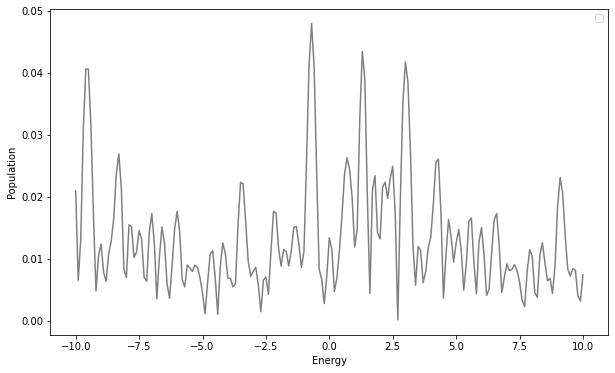

In [234]:
#tlist = np.linspace(0,error,stepnum)



fig, axes = plt.subplots(1, 1, figsize=(10,6))

# Reference point coordinates
ref_energy = eigvals[0]  # Example x-coordinate for the reference point
ref_val = np.sin(ref_energy)  # Example y-coordinate for the reference point

axes.plot(Energy, Val, "-",color="Gray")





axes.legend(loc=0)
axes.set_xlabel('Energy')
axes.set_ylabel('Population')

Text(0, 0.5, 'Population')

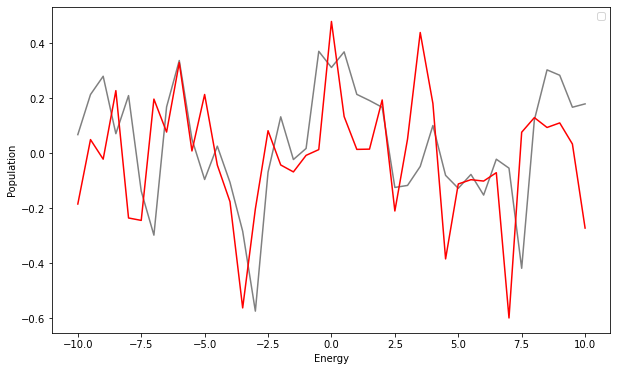

In [235]:
#tlist = np.linspace(0,error,stepnum)



fig, axes = plt.subplots(1, 1, figsize=(10,6))

# Reference point coordinates
ref_energy = eigvals[0]  # Example x-coordinate for the reference point
ref_val = np.sin(ref_energy)  # Example y-coordinate for the reference point

axes.plot(Time, EX, "-",color="Gray")

axes.plot(Time, EY, "-",color="Red")





axes.legend(loc=0)
axes.set_xlabel('Energy')
axes.set_ylabel('Population')

Text(0, 0.5, 'Population')

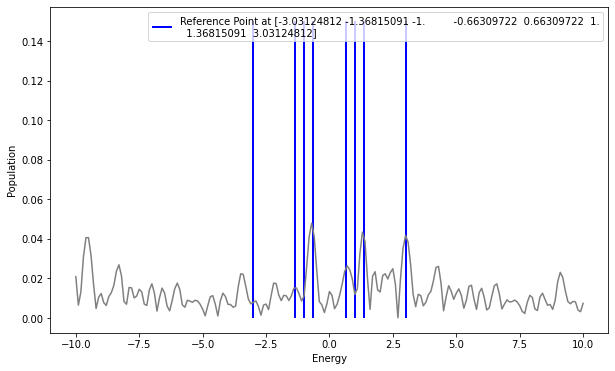

In [236]:
#tlist = np.linspace(0,error,stepnum)



fig, axes = plt.subplots(1, 1, figsize=(10,6))



axes.plot(Energy, Val, "-",color="Gray")

ref_energy= eigvals

axes.vlines(x=ref_energy, ymin=0, ymax=0.15, color='blue', linewidth=2, label=f'Reference Point at {ref_energy}')

axes.legend(loc=0)



axes.legend(loc=0)
axes.set_xlabel('Energy')
axes.set_ylabel('Population')